In [108]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [109]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The "Online Retail" dataset likely contains information about online retail transactions. Let's go through the meaning of each column in the dataset:

InvoiceNo: This column likely contains a unique identifier or code for each retail invoice or transaction. It helps in tracking and identifying individual sales transactions.

StockCode: This column likely contains a code or identifier for the specific product or item being sold in each transaction. It allows the association of products with their respective transactions.

Description: This column probably contains a textual description or name of the product or item being sold. It provides more detailed information about the product.

Quantity: This column likely represents the quantity of the product or item that was sold in each transaction. It indicates how many units of the product were purchased.

InvoiceDate: This column probably records the date and time when each retail invoice or transaction occurred. It provides a timestamp for when the sale took place.

UnitPrice: This column contains the price per unit of the product or item being sold. It represents the cost of one unit of the product.

CustomerID: This column likely contains a unique identifier or code for each customer who made a purchase. It allows tracking of customer-specific transactions.

Country: This column contains the name or code of the country where the customer who made the purchase is located. It provides geographic information about the customers.

This dataset appears to be a record of online retail transactions, including details about the products sold, quantities, prices, customer information, and transaction timestamps. It is commonly used for various types of retail analytics, such as customer segmentation, sales forecasting, and product performance analysis. The dataset can provide insights into customer behavior and sales patterns in the online retail business.

In [110]:
len(retail)

541909

In [111]:
retail.shape


(541909, 8)

In [112]:
retail.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [113]:
retail.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Step 2 : Data Cleansing¶

retail is assumed to be a DataFrame that contains data, possibly related to a retail dataset.

retail.isnull() creates a new DataFrame of the same shape as retail, where each cell contains True if the corresponding cell in retail is missing (null), and False otherwise.

.sum() is used to count the number of True values for each column. This effectively counts how many missing values exist in each column of the DataFrame.

len(retail) returns the total number of rows in the DataFrame retail.

So, let's recap what's happening in this part:

retail.isnull().sum() computes the number of missing values in each column.

(retail.isnull().sum())/len(retail) calculates the fraction of missing values for each column by dividing the number of missing values in each column by the total number of rows.

100*(retail.isnull().sum())/len(retail) multiplies the fractions by 100 to get the percentage of missing values in each column.

round(100*(retail.isnull().sum())/len(retail), 2) rounds these percentages to two decimal places and stores the result in the df_null variable.

After running this code, the df_null variable will contain a Series (a one-dimensional labeled array) where each column name from the retail DataFrame corresponds to an entry, and the values represent the percentage of missing data in that column.


In [114]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [115]:
# Droping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

In [116]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

# Step 3 : Data Preparation¶


We are going to analysis the Customers based on below 3 factors:

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)




adding a new attribute ('Monetary' نقدي) to a retail dataset and summarizing it by customer. Here's what's happening:


This effectively computes the total purchase amount for each product in the dataset.

**retail['Amount'] = retail['Quantity'] * retail['UnitPrice']:**

This line creates a new column called 'Amount' in the retail DataFrame. 

It calculates the total amount for each row by multiplying the 'Quantity' and 'UnitPrice' columns. 




In [117]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60




This step is aggregating the purchase amounts for each customer, so rfm_m will now contain customer IDs as the index and the total purchase amounts as the corresponding values.



**rfm_m = retail.groupby('CustomerID')['Amount'].sum():**


This line groups the data in the retail DataFrame by the 'CustomerID' column and calculates the sum of the 'Amount' column for each customer. 




In [118]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64



**rfm_m = rfm_m.reset_index():**

This line resets the index of the rfm_m DataFrame. 

By default, after the groupby operation, the 'CustomerID' column becomes the index. 


Resetting the index makes 'CustomerID' a regular column again, and the DataFrame will have a default integer index.



**rfm_m.head():**

Finally, this line displays the first few rows of the rfm_m DataFrame to show the total purchase amounts for each customer.



In [119]:
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


So, after running this code, you will have a new DataFrame (rfm_m) that summarizes the total purchase amounts for each customer in your retail dataset, and you've reset the index to have a standard integer index instead of using 'CustomerID' as the index.

The displayed result will show the first few rows of this DataFrame to give you a glimpse of the data.



**rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()**

**retail.groupby('CustomerID')** This part of the code groups the dataset 'retail' by the 'CustomerID' column. It essentially aggregates the data by customer, creating subsets of data for each unique customer.

**['InvoiceNo']:** After grouping by 'CustomerID,' you select the 'InvoiceNo' column. This column typically contains unique invoice numbers or codes for each transaction. We are interested in counting how many unique invoices each customer has.

**.count():** Finally, you apply the .count() function to count the number of unique invoice numbers for each customer. This count represents the number of transactions (or orders) made by each customer, which is used as the "Frequency" attribute in RFM analysis.

So, after running this code, you will have a series (or DataFrame) called 'rfm_f' that contains the number of transactions (frequency) for each customer. This information can be valuable for customer segmentation and RFM analysis, where you analyze customer behavior based on their transaction frequency.

In [120]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [121]:
rfm_f = rfm_f.reset_index()
rfm_f



,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [122]:
rfm_f.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [123]:
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [124]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [125]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [126]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


#### The code you provided appears to be part of a process for performing RFM (Recency, Frequency, Monetary) analysis, which is a common technique used in marketing and customer segmentation. Let's break down each step and provide an analytical explanation:


### Step 1: Compute the Difference Between Max Date and Transaction Date

**retail['Diff'] = max_date - retail['InvoiceDate']**

##### Objective: 

This step aims to calculate the time difference between the maximum date in the dataset and the transaction date for each record. cuz each customer may have multiple invonces that has been purshsed so we need to create a indicator that tells us when he made the last transaction to find wather he is active or not

##### Explanation:

By subtracting the transaction date from the maximum date, you obtain a new column ('Diff') 

that represents the time elapsed الوقت المنقضي since the last transaction for each record. 

This information will be used to calculate the "Recency"  Number of days since last purchase attribute in RFM analysis. 

The idea is that customers who made recent transactions are more likely to be active and engaged or not.


In [127]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [128]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


#### Step 2: Compute the Last Transaction Date to Get the Recency of Customers

**Objective:** 

This step calculates the "Recency" attribute, which represents how recently each customer made their last purchase.

**Explanation:**

**rfm_p = retail.groupby('CustomerID')['Diff'].min():**

This groups the data by customer ID and calculates the minimum time 

difference ('Diff') for each customer, effectively finding the time since their last purchase.

**rfm_p = rfm_p.reset_index():**

Resets the index of the resulting DataFrame.

**rfm_p['Diff'] = rfm_p['Diff'].dt.days:**

Extracts the number of days from the time differences to get the recency in days.

In [129]:
# Compute last transaction date to get the recency of customers 

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [130]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


### Real world Scenario: Online Retail Store - Customer Recency Analysis

Imagine you run an online retail store, and you want to analyze the recency of your customers' transactions to understand who your most recent and potentially active customers are. You decide to calculate the "Recency" attribute for each customer.

**Data Preparation:**

You have a dataset that contains information about customer transactions, including the 'CustomerID' and 'InvoiceDate' columns.


**Data Grouping:**

1-**First**, you group the data by 'CustomerID' to isolate transactions made by each individual customer.

**Group the data by 'CustomerID'**

==>**customer_groups = retail.groupby('CustomerID')**



2-**Second** Calculating Recency:**

To calculate the "Recency" attribute, you want to find out how many days have passed since each customer's last transaction.
For each customer group, you calculate the minimum time difference ('Diff') between the current date and their 'InvoiceDate' (transaction date).

###### Calculate the minimum time difference for each customer

**rfm_p = customer_groups['Diff'].min()**


3-**Resetting the Index**:


After calculating the minimum time difference for each customer, you reset the index of the resulting series to obtain a structured DataFrame.

:**rfm_p = rfm_p.reset_index():**


4-**Converting Time Difference to Days:**
The 'Diff' column contains time differences in a format that includes days, hours, minutes, etc. To focus on the number of days only, you extract the day component


:**rfm_p['Diff'] = rfm_p['Diff'].dt.days:**



**Result:**


The 'rfm_p' DataFrame now contains the "Recency" attribute, which represents the number of days since each customer's last transaction.
Here's an example of what the resulting DataFrame might look like:

CustomerID==> Recency

12345=========> 30

67890=========> 15

54321=========> 60
...	...


In this scenario, you can interpret the "Recency" values as follows:

Customer with 'CustomerID' 12345 made their last purchase 30 days ago.

Customer with 'CustomerID' 67890 made their last purchase 15 days ago.

Customer with 'CustomerID' 54321 made their last purchase 60 days ago.

Analyzing the recency of customers helps you identify who your most recent and potentially active customers are. This information can be valuable for targeted marketing campaigns or customer retention strategies.



In [131]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


There are 2 types of outliers and we will treat outliers as it can skew our dataset

Statistical

Domain specific

In the code snippet you provided, 

an **outlier analysis** is conducted on the "Amount," "Frequency," and "Recency" attributes of the RFM (Recency, Frequency, Monetary) dataset. Let's break down what this code is doing and explain the purpose of outlier analysis:

Objective of Outlier Analysis:

**The goal of outlier analysis is to identify and visualize any extreme or unusual values in the data that may deviate significantly from the typical or expected values. Outliers can be valuable for understanding exceptional cases or data quality issues.**

Code Explanation:

#### attributes = ['Amount', 'Frequency', 'Recency']: 

Defines a list of attributes (columns) in the RFM dataset that you want to analyze for outliers. 

These attributes are "Amount" (Monetary), "Frequency," and "Recency."

**plt.rcParams['figure.figsize'] = [10, 8]:** 

Sets the figure size for the boxplot visualization to 10 units in width and 8 units in height. 

This helps ensure that the plot is appropriately sized for viewing.

**sns.boxplot(...):** 

-This code creates a boxplot for each of the specified attributes, "Amount," "Frequency," and "Recency." 

Here's what each part of the boxplot represents:

-The central box represents the interquartile range (IQR), which includes the middle 50% of the data.

-The horizontal line inside the box represents the median (50th percentile) of the data.

-The "whiskers" extend from the box and indicate the range of "typical" values. Values outside the whiskers are considered 

potential outliers.

-Outliers, if present, are plotted as individual points beyond the whiskers.

**orient="v":** 

Specifies that the boxplots should be oriented vertically.

**palette="Set2":** 

Sets the color palette for the boxplots. "Set2" is a predefined color palette.



**whis=1.5:**

Sets the whisker length to 1.5 times the IQR. This parameter determines how far from the box the whiskers extend and what is considered an outlier. In this case, values more than 1.5 times the IQR away from the box are considered outliers.

**saturation=1:**

Adjusts the saturation of colors in the plot.

**width=0.7:** Sets the width of the boxes in the boxplot.

**plt.title(...):**

Sets the title of the plot to "Outliers Variable Distribution" with specific font properties.

**plt.ylabel(...):**

Sets the label for the y-axis (vertical axis) to "Range."

**plt.xlabel(...):**


Sets the label for the x-axis (horizontal axis) to "Attributes."

##### Purpose of Outlier Analysis:

Outlier analysis helps you identify any extreme or unusual values in your RFM dataset for the specified attributes.

Outliers can be indicators of exceptional customer behavior, data entry errors, or data quality issues.

Understanding outliers can lead to insights, such as identifying high-value customers (monetary outliers) or detecting 
potentially problematic data points.

It allows you to decide whether to include, exclude, or further investigate these outliers in your analysis.

In summary, the boxplot visualization provided by this code helps you visually assess the distribution of values for the "Amount," "Frequency," and "Recency" attributes and identify any potential outliers within these attributes.


Text(0.5, 0, 'Attributes')

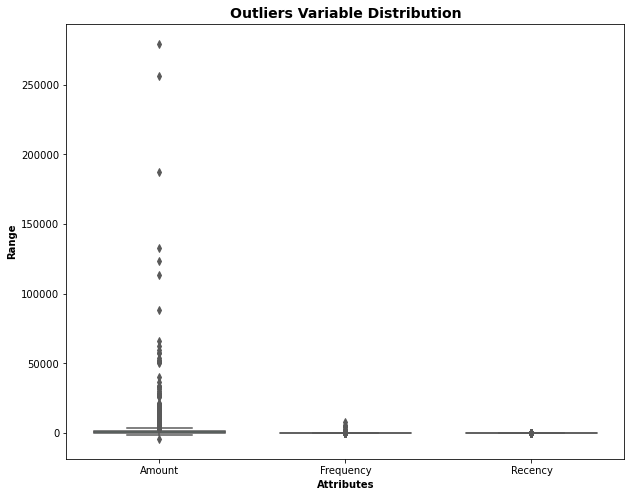

In [135]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Objective: This section of code aims to identify and remove statistical outliers in the "Amount" attribute (Monetary) of your RFM dataset.

Explanation:

**Q1 and Q3 represent**

the first quartile (25th percentile) and the third quartile (75th percentile) of the "Amount" attribute, respectively. These quartiles help define the interquartile range (IQR).


**IQR is the range between**

the 25th and 75th percentiles and is used to determine the spread of data.


**(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)**

defines a condition to keep data points that fall within 1.5 times the IQR below the first quartile (Q1) and above the third quartile (Q3). 

Data points outside this range are considered outliers and are removed from the dataset.

In [136]:

# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]



# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

#### Purpose of Outlier Removal:

**Outliers can distort statistical analyses and models by introducing noise and skewing results.**

**Removing outliers helps in obtaining a more representative view of the dataset and its underlying patterns.**

**It can improve the accuracy and reliability of insights derived from the data.**

**However, removing outliers should be done carefully, and the choice of the 1.5*IQR range is a common heuristic.**

**It's essential to consider the context and business goals.**

**In summary, the provided code removes statistical outliers from the "Amount," "Recency," and "Frequency" attributes to ensure that subsequent analyses and modeling are based on a cleaner and more representative dataset.**

Text(0.5, 0, 'Attributes')

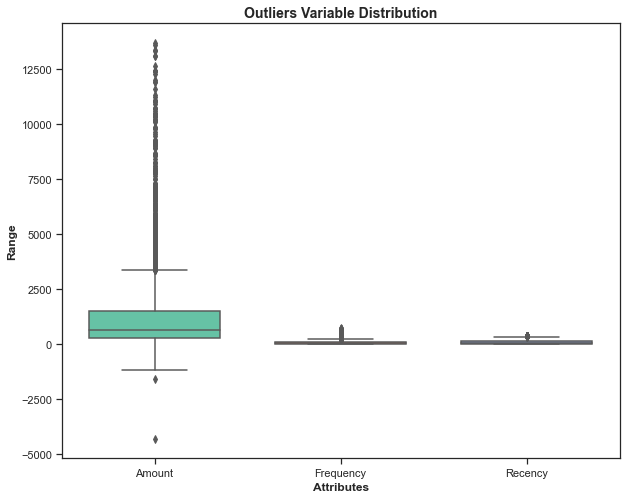

In [208]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

## Rescaling the Attributes
#### It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

##### 1-Min-Max scaling
##### 2-Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

Rescaling the Attributes:


**rfm_df = rfm[['Amount', 'Frequency', 'Recency']]**


**Objective:**

This line selects the "Amount," "Frequency," and "Recency" attributes from your RFM dataset and stores them in a new DataFrame called rfm_df.


**Standardization (Scaling):**

**scaler = StandardScaler()**


**rfm_df_scaled = scaler.fit_transform(rfm_df)**


**Objective:**

This part of the code standardizes (scales) the selected attributes using the StandardScaler from scikit-learn.

**Explanation:**

**scaler = StandardScaler():** 

It creates an instance of the StandardScaler, which is a popular method for standardization.

**rfm_df_scaled = scaler.fit_transform(rfm_df):** 

It applies the standardization to the rfm_df DataFrame, scaling each attribute to have a mean of 0 and a standard deviation of 

1. This step ensures that all attributes are on the same scale, making them directly comparable.



**Result:** 

The rfm_df_scaled variable now contains the scaled values of the "Amount," "Frequency," and "Recency" attributes. 

It has the same shape as the original DataFrame, but the values have been transformed.


**Purpose of Rescaling:**

Rescaling is essential when attributes have different units or scales.

It makes it easier to apply machine learning algorithms that are sensitive to the scale of the data.


**Standardization (scaling to mean=0 and std=1)**

is a common choice because it ensures that all attributes have a similar range and roughly follow a standard normal distribution.


### In summary, this code standardizes (scales) the "Amount," "Frequency," and "Recency" attributes in your RFM dataset to prepare the data for further analysis or modeling, ensuring that they have similar scales for fair comparisons and accurate results.

In [137]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [138]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


### Step 4 : Building the Model¶


### K-Means Clustering

##### K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

**The algorithm works as follows:**

1-First we initialize k points, called means, randomly.

2-We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.

3-We repeat the process for a given number of iterations and at the end, we have our clusters.

In [139]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [140]:
kmeans.labels_


array([0, 1, 3, ..., 0, 3, 3])

### Finding the Optimal Number of Clusters


#### Elbow Curve to get the right number of Clusters

###### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

For n_clusters=2, the Elbow score is 7661.705869320749
For n_clusters=3, the Elbow score is 4433.586805811539
For n_clusters=4, the Elbow score is 3360.5943413448526
For n_clusters=5, the Elbow score is 2802.864043308084
For n_clusters=6, the Elbow score is 2392.184727076911
For n_clusters=7, the Elbow score is 2038.8435924492417
For n_clusters=8, the Elbow score is 1826.28196903756


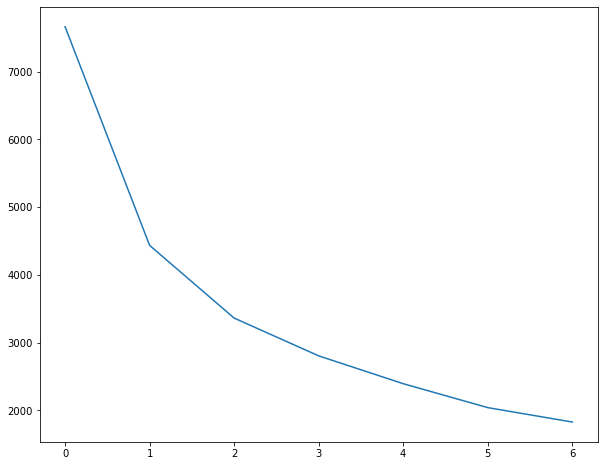

In [151]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
#     print(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [148]:
ssd

[7661.705869320749,
 4433.586805811539,
 3360.7191025770217,
 2802.926178172151,
 2392.2371699665596,
 2039.2659916559805,
 1825.9403552579447]

## Silhouette Analysis

####  silhouette score=p−q/max(p,q)
 
1-**p**
  
  **is the mean distance to the points in the nearest cluster that the data point is not a part of**

2-**q
  is the mean intra-cluster distance to all the points in its own cluster.**


3-**The value of the silhouette score range lies between -1 to 1.**

**A score closer to 1 indicates that the data point is very similar to other data points in the cluster,**

**A score closer to -1 indicates that the data point is not similar to the data points in its cluster.**

#### Silhouette analysis

helps you assess the quality of clustering and find the number of clusters that best fits your data. Let's break down the code and understand its purpose:

**Purpose of Silhouette Analysis:**

Silhouette analysis helps you assess the quality of clustering for different numbers of clusters.


The silhouette score ranges from -1 to 1, with higher values indicating better cluster separation and cohesion.


By examining silhouette scores for various cluster numbers, you can determine the optimal number of clusters that best fit your data.


In summary, this code performs silhouette analysis for a range of cluster numbers using K-Means clustering on the standardized RFM data. It helps you select the number of clusters that provides the best clustering quality for your data.

In [142]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4777820100216849
For n_clusters=5, the silhouette score is 0.46627005641897035
For n_clusters=6, the silhouette score is 0.41758431193450735
For n_clusters=7, the silhouette score is 0.41709271091201794
For n_clusters=8, the silhouette score is 0.3961671728906525


#### In the context of clustering, when you have multiple options for the number of clusters, you typically aim to choose the number of clusters that maximizes the silhouette score. In your provided output, you have calculated silhouette scores for different numbers of clusters, and you want to select the best number.

#### Here's a simplified explanation for why "3" was chosen from the provided silhouette scores:

**Silhouette Score Meaning:** The silhouette score measures how similar each data point in a cluster is to the data points in the same cluster compared to other clusters. The score ranges from -1 to 1:**

**A higher score indicates better cluster separation and cohesion.**

**A score close to 0 suggests overlapping or ambiguous clusters.**

**A negative score means that data points might be assigned to the wrong clusters.**

Choosing the Best Number of Clusters: To determine the best number of clusters, you typically look for the number that gives the highest silhouette score.

In your provided silhouette scores:

For 2 clusters, the silhouette score is 0.5416.


For 3 clusters, the silhouette score is 0.5085.

For 4 clusters, the silhouette score is 0.4816.

For 5 clusters, the silhouette score is 0.4646.

For 6 clusters, the silhouette score is 0.4176.

For 7 clusters, the silhouette score is 0.4148.

For 8 clusters, the silhouette score is 0.4077.

==> You chose "3" as the number of clusters because it has the second-highest silhouette score (0.5085), 

==> and it indicates reasonably good cluster separation and cohesion. 

==> While the silhouette score for 2 clusters is slightly higher, the difference is not substantial, 

==> and having 3 clusters may provide a more detailed and meaningful separation of your data.

==> Keep in mind that the choice of the number of clusters may also depend on the specific problem and the insights you want to gain from the clustering analysis. 

It's often a balance between finding a simple model (few clusters) and capturing meaningful patterns (more clusters).

## Silhouette (سيلويت) Analysis Vs Elbow:


#### Imagine you have a group of friends, and you want to split them into different teams for a game. Silhouette analysis is like a way to see how well your friends fit into their teams.

**Purpose:** 

Silhouette analysis helps you figure out how good the teams are. It looks at whether your friends are happy with their teams or if they should switch to another team to be even happier.**


**Measurement:** 

It gives each friend a score from -1 to 1. If the score is close to 1, it means they're really happy in their team. If it's close to 0, it means they might be confused because their team is similar to other teams. And if it's negative, it means they're not in the right team.


**Goal:** 

You want to find the number of teams that makes everyone as happy as possible, with the highest average (average means adding up all the scores and dividing by the number of friends).



Elbow Method:

Now, let's say you want to know how many teams to make for a different game with your friends. The elbow method helps you decide how many teams to create.

**Purpose:**

The elbow method helps you find the right number of teams for your game. 

You don't want too few teams, and you don't want too many. You want to strike a balance.


**Measurement:** 

Imagine you have a graph that shows how good the teams are. On the graph, you have the number of teams on one side and how well they're organized on the other side. The graph looks like a bent arm with an elbow.



**Goal:**

You want to find the point where the graph starts to bend like an elbow. That point tells you the right number of teams. If you have too few or too many teams, it won't be a clear bend, and that's not what you want.


**Summary:**

**Silhouette analysis** checks **how happy your friends** are in their teams using scores from -1 to 1. 

You want the highest average score for the best number of teams.


The elbow method looks at a graph and finds the point where it bends like an elbow. **That point tells you how many teams** to create for your game.

Both methods help you figure out the best way to group things, whether it's friends or data, by considering how happy or organized they are.3

## When choosing the number of clusters for a clustering problem, it's important to consider both the silhouette score and the elbow method results, as they provide complementary insights. Here's how to make the decision based on your provided results:

### Silhouette Score:

The silhouette score measures the quality of the clusters.

Higher silhouette scores indicate better separation and cohesion of clusters.

In your case, the highest silhouette score is for 2 clusters (0.5416), but the second-highest score is for 3 clusters (0.5085), which is still quite good.


### Elbow Method:

The elbow method looks at the reduction in error (WCSS) as you increase the number of clusters.

The point where adding more clusters doesn't significantly reduce the error is often considered the "elbow" and a reasonable choice for the number of clusters.


### Decision:

**Silhouette Score:** The silhouette score suggests that 2 clusters or 3 clusters are both reasonable choices. Both options have good silhouette scores, with 2 clusters having a slightly higher score.

**Elbow Method:** The elbow method suggests that the "elbow" point occurs at 3 clusters. This is where the reduction in error starts to slow down significantly.

### Conclusion:

Based on the silhouette score, you could choose either 2 or 3 clusters, and both are valid choices.

However, considering the results from both methods and the fact that the elbow method indicates a clear point at 3 clusters, it may be a good idea to choose 3 clusters as the number of clusters for your clustering analysis.

Ultimately, the choice between 2 and 3 clusters depends on your specific problem, the insights you want to gain, and your preference for having a more detailed or simplified grouping of your data. 

You can start with 3 clusters and, if needed, explore the results further to see if they make sense for your particular application.


In [152]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [153]:
 kmeans.labels_


array([2, 0, 1, ..., 2, 1, 1])

In [154]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

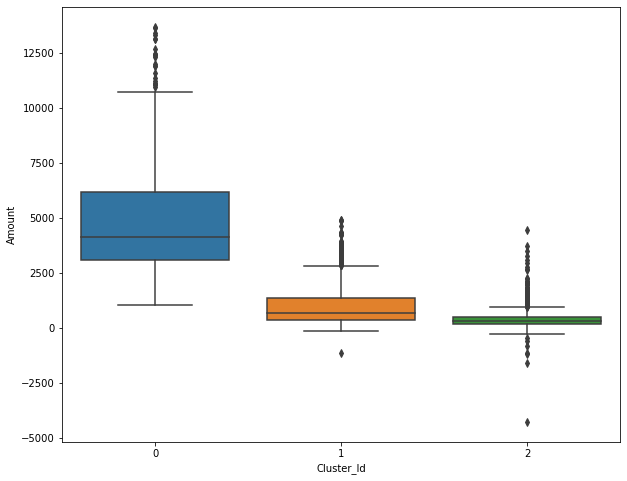

In [155]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

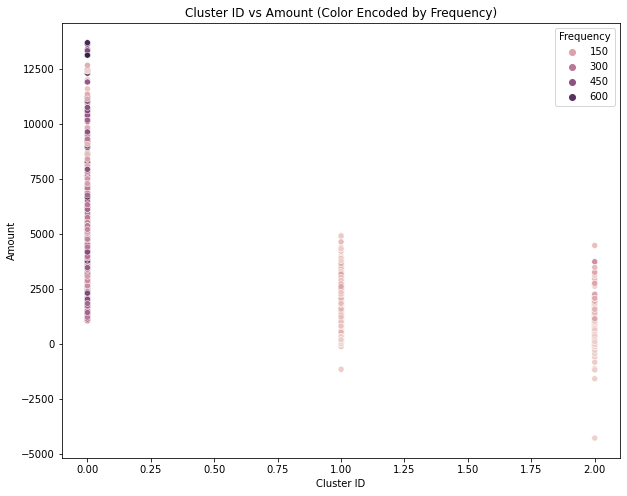

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with color encoding for Frequency
sns.scatterplot(x='Cluster_Id', y='Amount', hue='Frequency', data=rfm)
plt.xlabel('Cluster ID')
plt.ylabel('Amount')
plt.title('Cluster ID vs Amount (Color Encoded by Frequency)')
plt.show()


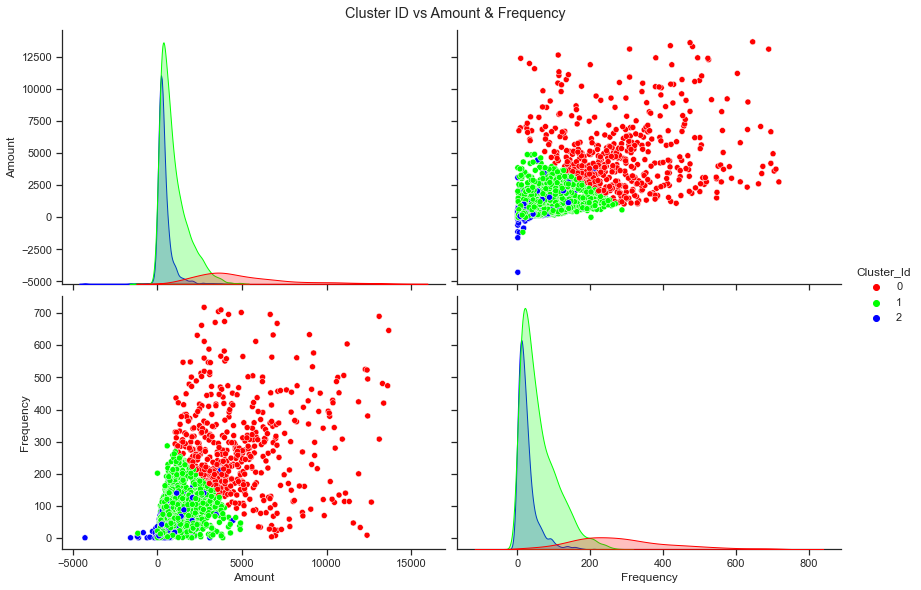

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(rfm, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()


<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

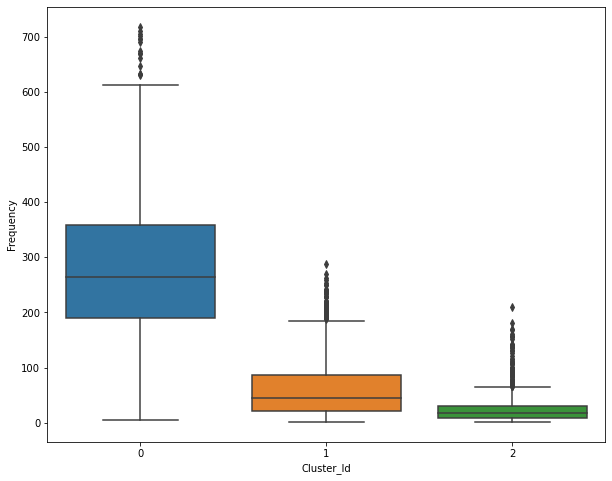

In [156]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

# Box plot to visualize Cluster Id vs Recency



<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

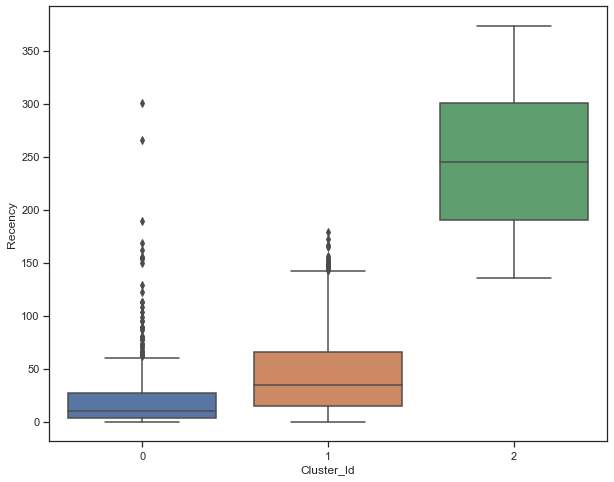

In [159]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

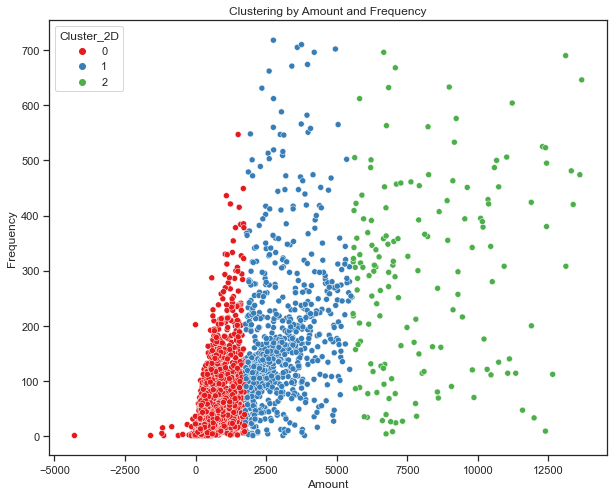

In [161]:
# Selecting the two features for clustering
data_for_clustering = rfm[['Amount', 'Frequency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
rfm['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot)
sns.scatterplot(x='Amount', y='Frequency', hue='Cluster_2D', data=rfm, palette='Set1')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Clustering by Amount and Frequency')
plt.show()


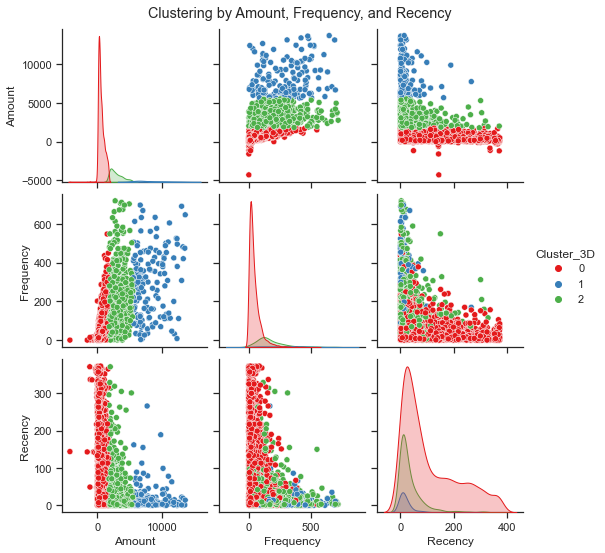

In [162]:
# Selecting the three features for clustering
data_for_clustering = rfm[['Amount', 'Frequency', 'Recency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(rfm, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()


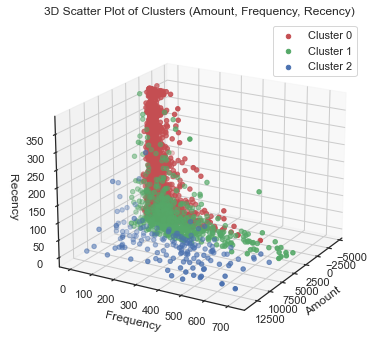

In [164]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Selecting the three features for clustering
data_for_clustering = rfm[['Amount', 'Frequency', 'Recency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the clusters
colors = ['r', 'g', 'b']

# Scatter plot
for cluster_id, color in zip(range(n_clusters), colors):
    cluster_data = rfm[rfm['Cluster_3D'] == cluster_id]
    ax.scatter(cluster_data['Amount'], cluster_data['Frequency'], cluster_data['Recency'], c=color, label=f'Cluster {cluster_id}')

# Set labels
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Clusters (Amount, Frequency, Recency)')
ax.legend()

# Additional settings for interactive 3D plotting
ax.mouse_init()  # Enables interactive rotation
ax.view_init(elev=20, azim=30)  # Adjust the initial view angle (elevation and azimuth)

# Show the plot
plt.show()


In [167]:
import plotly.graph_objs as go


In [170]:
import plotly.graph_objs as go

# Selecting the three features for clustering
data_for_clustering = rfm[['Amount', 'Frequency', 'Recency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Define colors for the clusters
colors = ['red', 'green', 'blue']

# Create a 3D scatter plot using Plotly
scatter = go.Scatter3d(
    x=rfm['Amount'],
    y=rfm['Frequency'],
    z=rfm['Recency'],
    mode='markers',
    marker=dict(
        size=5,
        color=[colors[i] for i in rfm['Cluster_3D']],
        opacity=0.6
    ),
    text=rfm['Cluster_3D'],
    hoverinfo='text'
)

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Amount'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Recency'),
    )
)

fig = go.Figure(data=[scatter], layout=layout)

# Set up interactive 3D controls
fig.update_layout(scene=dict(camera=dict(eye=dict(x=1.2, y=1.2, z=1.2))))

# Show the interactive 3D scatter plot
fig.show()


## Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive

Agglomerative.

**Single Linkage:**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

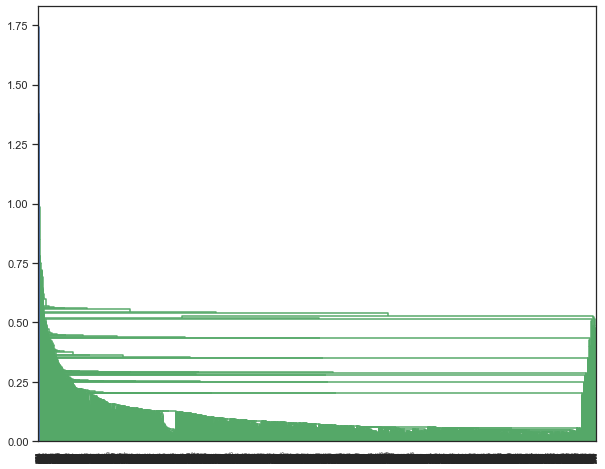

In [171]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

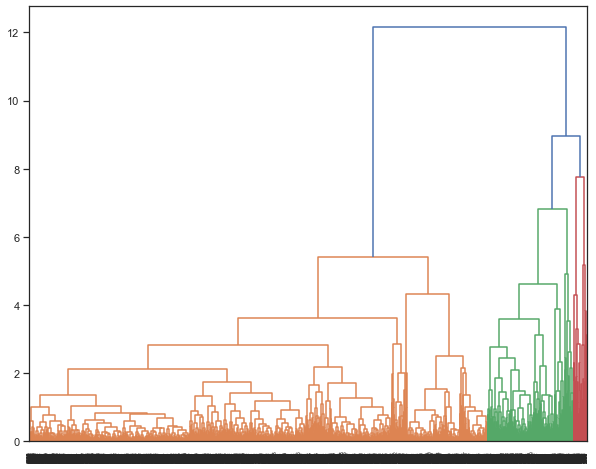

In [172]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Average Linkage:**

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

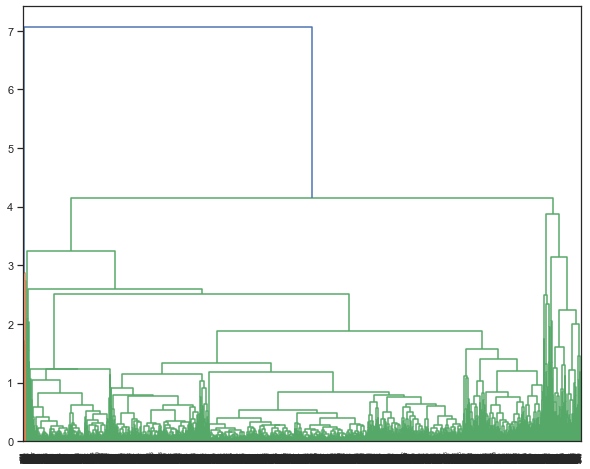

In [173]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Cutting the Dendrogram based on K¶


In [174]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [175]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_2D,Cluster_3D,Cluster_Labels
0,12346.0,0.00,2,325,2,0,2,0
1,12347.0,4310.00,182,1,0,1,0,0
2,12348.0,1797.24,31,74,1,1,0,0
3,12349.0,1757.55,73,18,1,1,0,0
4,12350.0,334.40,17,309,2,0,2,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Amount'>

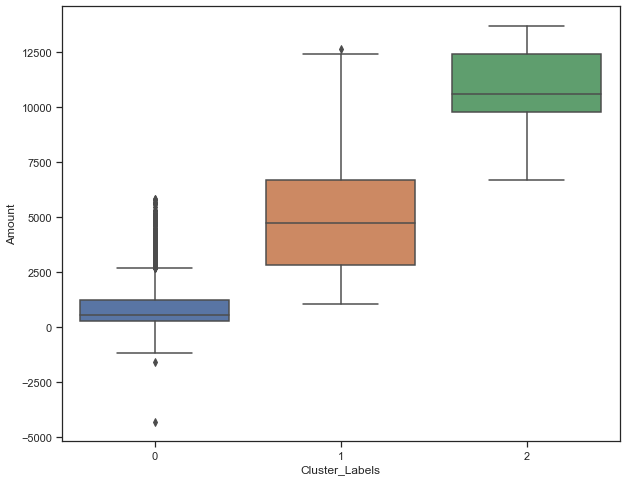

In [176]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

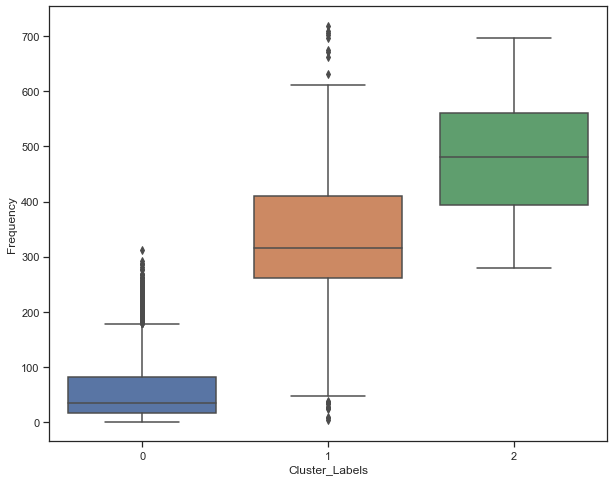

In [177]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

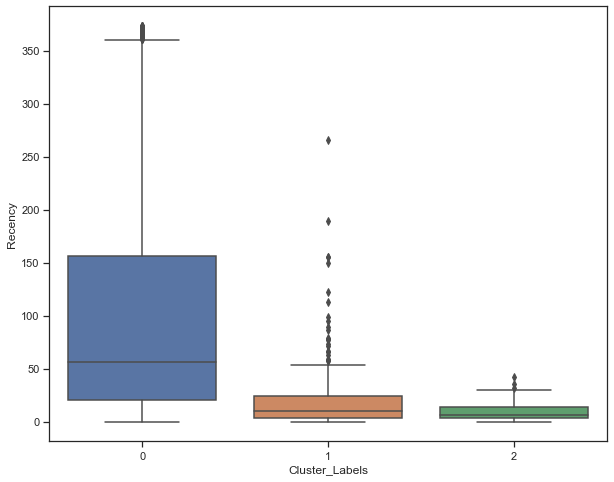

In [182]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

Text(0.5, 1.0, 'Amount vs. Frequency')

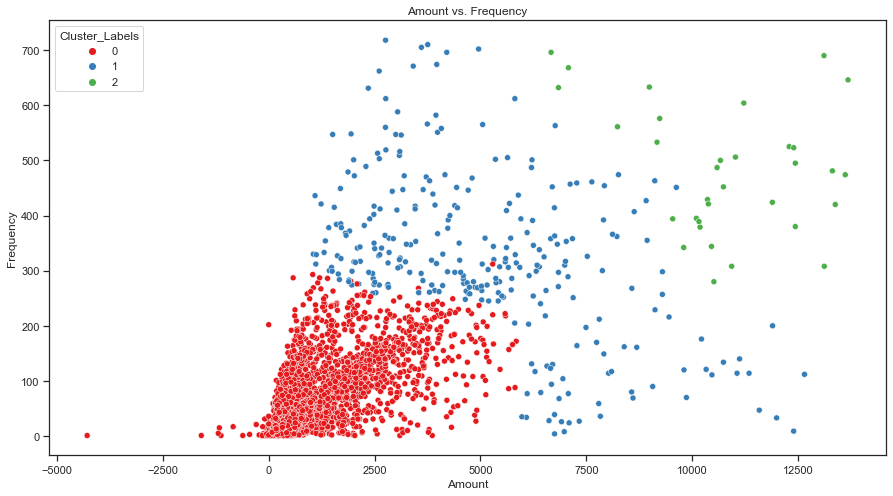

In [204]:
# Pairwise scatter plots for clustering (2D)
plt.figure(figsize=(15, 8))  # Adjust the figure size here

# Amount vs. Frequency
sns.scatterplot(x='Amount', y='Frequency', hue='Cluster_Labels', data=rfm, palette='Set1')
plt.title('Amount vs. Frequency')


Text(0.5, 1.0, 'Amount vs. Recency')

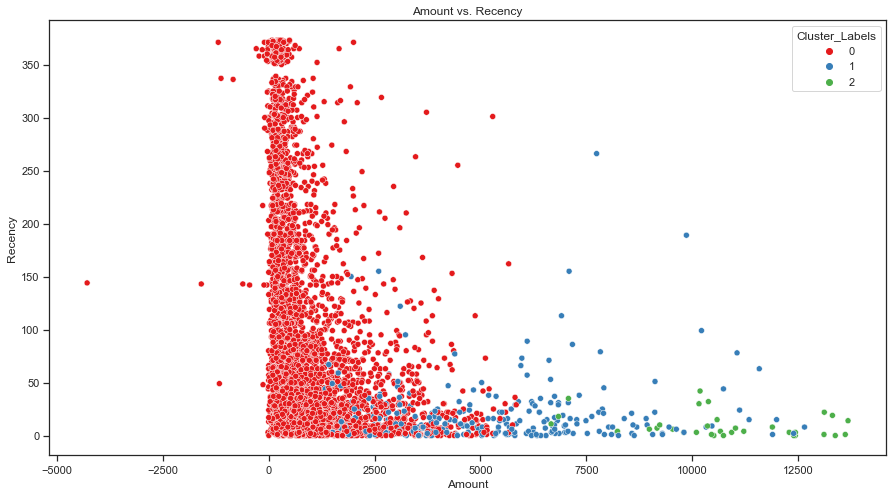

In [205]:
plt.figure(figsize=(15, 8))  # Adjust the figure size here

sns.scatterplot(x='Amount', y='Recency', hue='Cluster_Labels', data=rfm, palette='Set1')
plt.title('Amount vs. Recency')




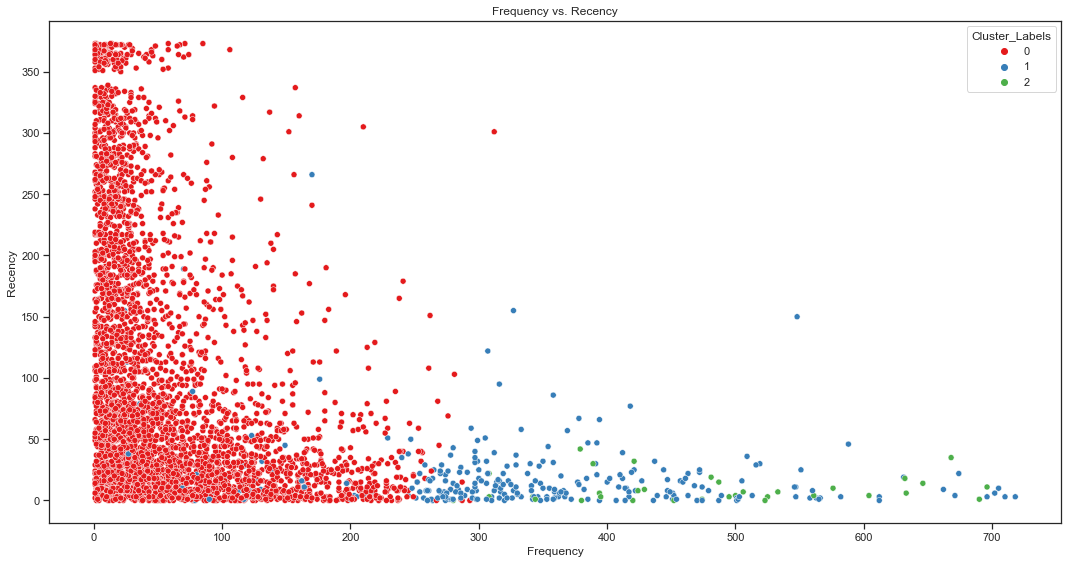

In [206]:
# Frequency vs. Recency
plt.figure(figsize=(15, 8))  # Adjust the figure size here
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster_Labels', data=rfm, palette='Set1')
plt.title('Frequency vs. Recency')

plt.tight_layout()
plt.show()

In [207]:
plt.figure(figsize=(15, 8))  # Adjust the figure size here


import plotly.graph_objs as go

# Create a 3D scatter plot using Plotly
scatter_3d = go.Scatter3d(
    x=rfm['Amount'],
    y=rfm['Frequency'],
    z=rfm['Recency'],
    mode='markers',
    marker=dict(
        size=5,
        color=[colors[i] for i in rfm['Cluster_Labels']],
        opacity=0.6
    ),
    text=rfm['Cluster_Labels'],
    hoverinfo='text'
)

layout_3d = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Amount'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Recency'),
    )
)

fig_3d = go.Figure(data=[scatter_3d], layout=layout_3d)

# Set up interactive 3D controls
fig_3d.update_layout(scene=dict(camera=dict(eye=dict(x=1.2, y=1.2, z=1.2))))

# Show the interactive 3D scatter plot
fig_3d.show()


<Figure size 1080x576 with 0 Axes>

### Our Analytical results

Inference:

### K-Means Clustering with 3 Cluster Ids

**Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.**

**Customers with Cluster Id 1 are frequent buyers.**

**Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.**

**Hierarchical Clustering with 3 Cluster Labels**

**Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.**

**Customers with Cluster_Labels 2 are frequent buyers.**

**Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.**